In [1]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
import os
from torchvision import datasets, transforms

IMG_EXTENSIONS = (".jpg", ".jpeg", ".png", ".ppm", ".bmp", ".pgm", ".tif", ".tiff", ".webp")


# Update the data path to the local directory where you've downloaded the EuroSAT_RGB dataset
data_path = os.path.expanduser("/STA380-ML/EuroSAT_RGB")

# Define the data transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    
])

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_path, transform=transform)


In [3]:
dataset

Dataset ImageFolder
    Number of datapoints: 27000
    Root location: /Users/aishwarya/Documents/Study/STA380-ML/EuroSAT_RGB
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [4]:
from torch.utils.data import random_split

# Split the dataset into train and test sets (80/20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_set, test_set = random_split(dataset, [train_size, test_size])


In [5]:
from torch.utils.data import DataLoader

# Create data loaders
#Set batch size
batch_size = 32

# DataLoader with batch size 
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)



In [6]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(64 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, num_classes)
        
    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        
        x = x.view(-1, 64 * 16 * 16)  # Flatten
        
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x


In [7]:
# Define the number of classes in your dataset
num_classes = 11  # Adjust based on your dataset
num_epochs = 5

# Create an instance of the SimpleCNN model
model = SimpleCNN(num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 2.4097
Epoch [1/5], Loss: 2.8742
Epoch [1/5], Loss: 2.2226
Epoch [1/5], Loss: 2.2807
Epoch [1/5], Loss: 2.0204
Epoch [1/5], Loss: 1.8967
Epoch [1/5], Loss: 2.3696
Epoch [1/5], Loss: 1.7689
Epoch [1/5], Loss: 1.9692
Epoch [1/5], Loss: 2.1111
Epoch [1/5], Loss: 1.9465
Epoch [1/5], Loss: 1.7730
Epoch [1/5], Loss: 2.0143
Epoch [1/5], Loss: 1.8751
Epoch [1/5], Loss: 1.9995
Epoch [1/5], Loss: 1.8456
Epoch [1/5], Loss: 1.7632
Epoch [1/5], Loss: 1.7723
Epoch [1/5], Loss: 1.8709
Epoch [1/5], Loss: 1.5115
Epoch [1/5], Loss: 1.5135
Epoch [1/5], Loss: 1.7410
Epoch [1/5], Loss: 1.5709
Epoch [1/5], Loss: 1.8248
Epoch [1/5], Loss: 1.3961
Epoch [1/5], Loss: 2.2921
Epoch [1/5], Loss: 1.6142
Epoch [1/5], Loss: 1.4758
Epoch [1/5], Loss: 1.1324
Epoch [1/5], Loss: 1.6129
Epoch [1/5], Loss: 1.9045
Epoch [1/5], Loss: 1.4438
Epoch [1/5], Loss: 1.4423
Epoch [1/5], Loss: 1.4782
Epoch [1/5], Loss: 1.4334
Epoch [1/5], Loss: 1.5180
Epoch [1/5], Loss: 1.4780
Epoch [1/5], Loss: 1.4988
Epoch [1/5],

Epoch [1/5], Loss: 0.7308
Epoch [1/5], Loss: 0.8604
Epoch [1/5], Loss: 0.7224
Epoch [1/5], Loss: 1.1509
Epoch [1/5], Loss: 1.4200
Epoch [1/5], Loss: 1.0702
Epoch [1/5], Loss: 0.9567
Epoch [1/5], Loss: 1.2473
Epoch [1/5], Loss: 0.8264
Epoch [1/5], Loss: 0.7146
Epoch [1/5], Loss: 0.8138
Epoch [1/5], Loss: 0.7229
Epoch [1/5], Loss: 0.8784
Epoch [1/5], Loss: 0.8450
Epoch [1/5], Loss: 0.8921
Epoch [1/5], Loss: 0.9936
Epoch [1/5], Loss: 0.7969
Epoch [1/5], Loss: 0.7787
Epoch [1/5], Loss: 0.5732
Epoch [1/5], Loss: 1.1125
Epoch [1/5], Loss: 1.1512
Epoch [1/5], Loss: 0.7183
Epoch [1/5], Loss: 1.0333
Epoch [1/5], Loss: 0.9665
Epoch [1/5], Loss: 0.7081
Epoch [1/5], Loss: 0.8937
Epoch [1/5], Loss: 1.1095
Epoch [1/5], Loss: 0.7894
Epoch [1/5], Loss: 0.8560
Epoch [1/5], Loss: 1.0514
Epoch [1/5], Loss: 0.8050
Epoch [1/5], Loss: 0.9498
Epoch [1/5], Loss: 0.8488
Epoch [1/5], Loss: 0.7410
Epoch [1/5], Loss: 0.8866
Epoch [1/5], Loss: 0.7895
Epoch [1/5], Loss: 0.5307
Epoch [1/5], Loss: 0.8190
Epoch [1/5],

Epoch [1/5], Loss: 0.8537
Epoch [1/5], Loss: 0.8498
Epoch [1/5], Loss: 0.7606
Epoch [1/5], Loss: 0.7173
Epoch [1/5], Loss: 0.5118
Epoch [1/5], Loss: 0.7870
Epoch [1/5], Loss: 1.2063
Epoch [1/5], Loss: 0.9207
Epoch [1/5], Loss: 0.8742
Epoch [1/5], Loss: 0.5360
Epoch [1/5], Loss: 0.6384
Epoch [1/5], Loss: 0.4657
Epoch [1/5], Loss: 0.5324
Epoch [1/5], Loss: 0.8837
Epoch [1/5], Loss: 0.5809
Epoch [1/5], Loss: 0.7179
Epoch [1/5], Loss: 0.6725
Epoch [1/5], Loss: 0.7214
Epoch [1/5], Loss: 0.6661
Epoch [1/5], Loss: 0.6732
Epoch [1/5], Loss: 0.4519
Epoch [1/5], Loss: 0.4604
Epoch [1/5], Loss: 0.9709
Epoch [1/5], Loss: 0.5140
Epoch [1/5], Loss: 0.6749
Epoch [1/5], Loss: 0.6500
Epoch [1/5], Loss: 0.7764
Epoch [1/5], Loss: 0.6677
Epoch [1/5], Loss: 0.3574
Epoch [1/5], Loss: 0.7705
Epoch [1/5], Loss: 0.5509
Epoch [1/5], Loss: 0.7920
Epoch [1/5], Loss: 0.4326
Epoch [1/5], Loss: 0.6742
Epoch [1/5], Loss: 0.6811
Epoch [1/5], Loss: 0.4817
Epoch [1/5], Loss: 0.8331
Epoch [1/5], Loss: 0.6233
Epoch [1/5],

Epoch [2/5], Loss: 0.5750
Epoch [2/5], Loss: 0.3595
Epoch [2/5], Loss: 0.5267
Epoch [2/5], Loss: 0.4428
Epoch [2/5], Loss: 0.8339
Epoch [2/5], Loss: 0.5230
Epoch [2/5], Loss: 0.6425
Epoch [2/5], Loss: 0.6651
Epoch [2/5], Loss: 0.7397
Epoch [2/5], Loss: 0.6518
Epoch [2/5], Loss: 0.3504
Epoch [2/5], Loss: 0.3542
Epoch [2/5], Loss: 0.5351
Epoch [2/5], Loss: 0.6415
Epoch [2/5], Loss: 0.5029
Epoch [2/5], Loss: 0.3397
Epoch [2/5], Loss: 0.4661
Epoch [2/5], Loss: 0.9972
Epoch [2/5], Loss: 0.9888
Epoch [2/5], Loss: 0.2905
Epoch [2/5], Loss: 0.8013
Epoch [2/5], Loss: 0.6845
Epoch [2/5], Loss: 0.9804
Epoch [2/5], Loss: 1.0930
Epoch [2/5], Loss: 0.5399
Epoch [2/5], Loss: 0.4778
Epoch [2/5], Loss: 0.3533
Epoch [2/5], Loss: 0.9462
Epoch [2/5], Loss: 0.9585
Epoch [2/5], Loss: 0.7635
Epoch [2/5], Loss: 0.4447
Epoch [2/5], Loss: 0.5108
Epoch [2/5], Loss: 0.4762
Epoch [2/5], Loss: 1.0997
Epoch [2/5], Loss: 0.5227
Epoch [2/5], Loss: 0.8872
Epoch [2/5], Loss: 0.5875
Epoch [2/5], Loss: 0.5542
Epoch [2/5],

Epoch [2/5], Loss: 0.8310
Epoch [2/5], Loss: 0.5941
Epoch [2/5], Loss: 0.5379
Epoch [2/5], Loss: 0.4282
Epoch [2/5], Loss: 0.3009
Epoch [2/5], Loss: 0.6225
Epoch [2/5], Loss: 0.4215
Epoch [2/5], Loss: 0.5506
Epoch [2/5], Loss: 0.6549
Epoch [2/5], Loss: 0.7738
Epoch [2/5], Loss: 0.6712
Epoch [2/5], Loss: 0.7578
Epoch [2/5], Loss: 0.3868
Epoch [2/5], Loss: 0.5517
Epoch [2/5], Loss: 0.7571
Epoch [2/5], Loss: 0.6772
Epoch [2/5], Loss: 0.5571
Epoch [2/5], Loss: 0.4727
Epoch [2/5], Loss: 0.6501
Epoch [2/5], Loss: 0.6856
Epoch [2/5], Loss: 0.3952
Epoch [2/5], Loss: 0.6214
Epoch [2/5], Loss: 0.3491
Epoch [2/5], Loss: 0.6900
Epoch [2/5], Loss: 0.5827
Epoch [2/5], Loss: 0.2190
Epoch [2/5], Loss: 0.9517
Epoch [2/5], Loss: 0.3817
Epoch [2/5], Loss: 0.3031
Epoch [2/5], Loss: 0.3645
Epoch [2/5], Loss: 0.3996
Epoch [2/5], Loss: 0.5072
Epoch [2/5], Loss: 0.4626
Epoch [2/5], Loss: 0.2972
Epoch [2/5], Loss: 0.3282
Epoch [2/5], Loss: 0.7176
Epoch [2/5], Loss: 0.5498
Epoch [2/5], Loss: 0.5606
Epoch [2/5],

Epoch [3/5], Loss: 0.3865
Epoch [3/5], Loss: 0.4976
Epoch [3/5], Loss: 0.3229
Epoch [3/5], Loss: 0.2018
Epoch [3/5], Loss: 0.2903
Epoch [3/5], Loss: 0.1311
Epoch [3/5], Loss: 0.3824
Epoch [3/5], Loss: 0.6455
Epoch [3/5], Loss: 0.5580
Epoch [3/5], Loss: 0.2073
Epoch [3/5], Loss: 0.1682
Epoch [3/5], Loss: 0.4076
Epoch [3/5], Loss: 0.3499
Epoch [3/5], Loss: 0.3977
Epoch [3/5], Loss: 0.1552
Epoch [3/5], Loss: 0.4780
Epoch [3/5], Loss: 0.3627
Epoch [3/5], Loss: 0.4763
Epoch [3/5], Loss: 0.3522
Epoch [3/5], Loss: 0.3020
Epoch [3/5], Loss: 0.4689
Epoch [3/5], Loss: 0.4545
Epoch [3/5], Loss: 0.1609
Epoch [3/5], Loss: 0.3225
Epoch [3/5], Loss: 0.4268
Epoch [3/5], Loss: 0.4188
Epoch [3/5], Loss: 0.5457
Epoch [3/5], Loss: 0.3768
Epoch [3/5], Loss: 0.9895
Epoch [3/5], Loss: 0.5286
Epoch [3/5], Loss: 0.5057
Epoch [3/5], Loss: 0.2702
Epoch [3/5], Loss: 0.3306
Epoch [3/5], Loss: 0.3721
Epoch [3/5], Loss: 0.4497
Epoch [3/5], Loss: 0.1948
Epoch [3/5], Loss: 0.4618
Epoch [3/5], Loss: 0.4255
Epoch [3/5],

Epoch [3/5], Loss: 0.5078
Epoch [3/5], Loss: 0.5256
Epoch [3/5], Loss: 0.3413
Epoch [3/5], Loss: 0.6279
Epoch [3/5], Loss: 0.3402
Epoch [3/5], Loss: 0.3116
Epoch [3/5], Loss: 0.3862
Epoch [3/5], Loss: 0.5270
Epoch [3/5], Loss: 0.2300
Epoch [3/5], Loss: 0.4506
Epoch [3/5], Loss: 0.2208
Epoch [3/5], Loss: 0.5237
Epoch [3/5], Loss: 0.7203
Epoch [3/5], Loss: 0.5493
Epoch [3/5], Loss: 0.4370
Epoch [3/5], Loss: 0.2570
Epoch [3/5], Loss: 0.7715
Epoch [3/5], Loss: 0.5311
Epoch [3/5], Loss: 0.4776
Epoch [3/5], Loss: 0.4301
Epoch [3/5], Loss: 0.4416
Epoch [3/5], Loss: 0.3756
Epoch [3/5], Loss: 0.5497
Epoch [3/5], Loss: 0.3918
Epoch [3/5], Loss: 0.3706
Epoch [3/5], Loss: 0.4155
Epoch [3/5], Loss: 0.4080
Epoch [3/5], Loss: 0.7443
Epoch [3/5], Loss: 0.2699
Epoch [3/5], Loss: 0.3106
Epoch [3/5], Loss: 0.2730
Epoch [3/5], Loss: 0.2488
Epoch [3/5], Loss: 0.3684
Epoch [3/5], Loss: 0.3998
Epoch [3/5], Loss: 0.4564
Epoch [3/5], Loss: 0.1882
Epoch [3/5], Loss: 0.4601
Epoch [3/5], Loss: 0.2587
Epoch [3/5],

Epoch [4/5], Loss: 0.2981
Epoch [4/5], Loss: 0.1423
Epoch [4/5], Loss: 0.4018
Epoch [4/5], Loss: 0.3602
Epoch [4/5], Loss: 0.3625
Epoch [4/5], Loss: 0.4233
Epoch [4/5], Loss: 0.2988
Epoch [4/5], Loss: 0.2383
Epoch [4/5], Loss: 0.2852
Epoch [4/5], Loss: 0.2169
Epoch [4/5], Loss: 0.4191
Epoch [4/5], Loss: 0.2457
Epoch [4/5], Loss: 0.1504
Epoch [4/5], Loss: 0.6823
Epoch [4/5], Loss: 0.5725
Epoch [4/5], Loss: 0.2590
Epoch [4/5], Loss: 0.3166
Epoch [4/5], Loss: 0.2758
Epoch [4/5], Loss: 0.2546
Epoch [4/5], Loss: 0.2940
Epoch [4/5], Loss: 0.5449
Epoch [4/5], Loss: 0.3784
Epoch [4/5], Loss: 0.3063
Epoch [4/5], Loss: 0.1845
Epoch [4/5], Loss: 0.4201
Epoch [4/5], Loss: 0.2481
Epoch [4/5], Loss: 0.3974
Epoch [4/5], Loss: 0.4725
Epoch [4/5], Loss: 0.2193
Epoch [4/5], Loss: 0.2766
Epoch [4/5], Loss: 0.4438
Epoch [4/5], Loss: 0.4187
Epoch [4/5], Loss: 0.2769
Epoch [4/5], Loss: 0.3745
Epoch [4/5], Loss: 0.3989
Epoch [4/5], Loss: 0.1478
Epoch [4/5], Loss: 0.2288
Epoch [4/5], Loss: 0.3209
Epoch [4/5],

Epoch [4/5], Loss: 0.3507
Epoch [4/5], Loss: 0.3660
Epoch [4/5], Loss: 0.4238
Epoch [4/5], Loss: 0.3528
Epoch [4/5], Loss: 0.2391
Epoch [4/5], Loss: 0.2430
Epoch [4/5], Loss: 0.1955
Epoch [4/5], Loss: 0.4353
Epoch [4/5], Loss: 0.2101
Epoch [4/5], Loss: 0.2337
Epoch [4/5], Loss: 0.0997
Epoch [4/5], Loss: 0.0624
Epoch [4/5], Loss: 0.1809
Epoch [4/5], Loss: 0.2848
Epoch [4/5], Loss: 0.2180
Epoch [4/5], Loss: 0.2438
Epoch [4/5], Loss: 0.1649
Epoch [4/5], Loss: 0.3119
Epoch [4/5], Loss: 0.1538
Epoch [4/5], Loss: 0.2468
Epoch [4/5], Loss: 0.1519
Epoch [4/5], Loss: 0.3965
Epoch [4/5], Loss: 0.2277
Epoch [4/5], Loss: 0.1813
Epoch [4/5], Loss: 0.3407
Epoch [4/5], Loss: 0.3590
Epoch [4/5], Loss: 0.1377
Epoch [4/5], Loss: 0.3136
Epoch [4/5], Loss: 0.2857
Epoch [4/5], Loss: 0.2804
Epoch [4/5], Loss: 0.4639
Epoch [4/5], Loss: 0.2495
Epoch [4/5], Loss: 0.1383
Epoch [4/5], Loss: 0.2047
Epoch [4/5], Loss: 0.3587
Epoch [4/5], Loss: 0.3609
Epoch [4/5], Loss: 0.4712
Epoch [4/5], Loss: 0.3186
Epoch [4/5],

Epoch [5/5], Loss: 0.3040
Epoch [5/5], Loss: 0.1408
Epoch [5/5], Loss: 0.1940
Epoch [5/5], Loss: 0.1256
Epoch [5/5], Loss: 0.5065
Epoch [5/5], Loss: 0.1860
Epoch [5/5], Loss: 0.3227
Epoch [5/5], Loss: 0.5075
Epoch [5/5], Loss: 0.1233
Epoch [5/5], Loss: 0.0798
Epoch [5/5], Loss: 0.4925
Epoch [5/5], Loss: 0.4348
Epoch [5/5], Loss: 0.1534
Epoch [5/5], Loss: 0.2628
Epoch [5/5], Loss: 0.2163
Epoch [5/5], Loss: 0.0778
Epoch [5/5], Loss: 0.0849
Epoch [5/5], Loss: 0.0537
Epoch [5/5], Loss: 0.0564
Epoch [5/5], Loss: 0.3593
Epoch [5/5], Loss: 0.1901
Epoch [5/5], Loss: 0.2123
Epoch [5/5], Loss: 0.1096
Epoch [5/5], Loss: 0.2282
Epoch [5/5], Loss: 0.1714
Epoch [5/5], Loss: 0.1906
Epoch [5/5], Loss: 0.1966
Epoch [5/5], Loss: 0.1938
Epoch [5/5], Loss: 0.1961
Epoch [5/5], Loss: 0.1156
Epoch [5/5], Loss: 0.0319
Epoch [5/5], Loss: 0.1299
Epoch [5/5], Loss: 0.2830
Epoch [5/5], Loss: 0.1995
Epoch [5/5], Loss: 0.0814
Epoch [5/5], Loss: 0.1969
Epoch [5/5], Loss: 0.2347
Epoch [5/5], Loss: 0.1738
Epoch [5/5],

Epoch [5/5], Loss: 0.0726
Epoch [5/5], Loss: 0.3237
Epoch [5/5], Loss: 0.5643
Epoch [5/5], Loss: 0.1037
Epoch [5/5], Loss: 0.2203
Epoch [5/5], Loss: 0.4944
Epoch [5/5], Loss: 0.0790
Epoch [5/5], Loss: 0.4195
Epoch [5/5], Loss: 0.1051
Epoch [5/5], Loss: 0.2192
Epoch [5/5], Loss: 0.2714
Epoch [5/5], Loss: 0.2028
Epoch [5/5], Loss: 0.1296
Epoch [5/5], Loss: 0.1828
Epoch [5/5], Loss: 0.4298
Epoch [5/5], Loss: 0.1273
Epoch [5/5], Loss: 0.1758
Epoch [5/5], Loss: 0.2467
Epoch [5/5], Loss: 0.1190
Epoch [5/5], Loss: 0.1043
Epoch [5/5], Loss: 0.2169
Epoch [5/5], Loss: 0.3373
Epoch [5/5], Loss: 0.1848
Epoch [5/5], Loss: 0.1254
Epoch [5/5], Loss: 0.2348
Epoch [5/5], Loss: 0.2233
Epoch [5/5], Loss: 0.2730
Epoch [5/5], Loss: 0.2109
Epoch [5/5], Loss: 0.1726
Epoch [5/5], Loss: 0.1223
Epoch [5/5], Loss: 0.3531
Epoch [5/5], Loss: 0.1457
Epoch [5/5], Loss: 0.2069
Epoch [5/5], Loss: 0.3169
Epoch [5/5], Loss: 0.0879
Epoch [5/5], Loss: 0.1992
Epoch [5/5], Loss: 0.1821
Epoch [5/5], Loss: 0.1048
Epoch [5/5],

In [8]:
model.eval()

correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass
        outputs = model(images)
        
        # Calculate accuracy
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.2%}")


Test Accuracy: 87.28%


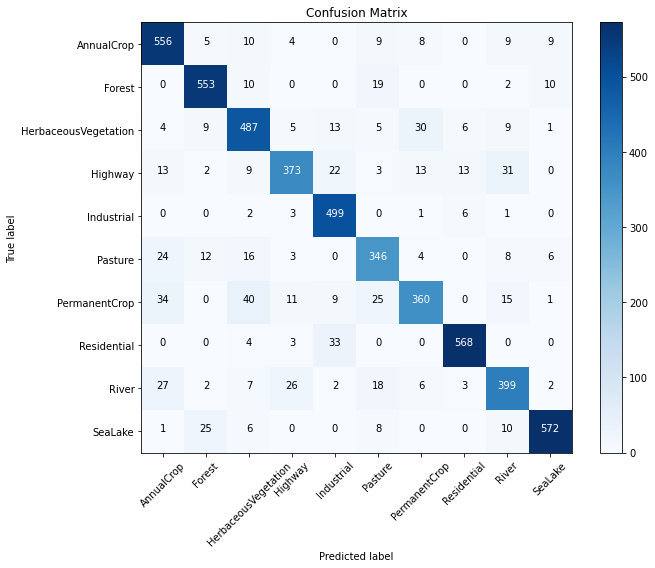

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True labels:  PermanentCrop Forest Pasture Residential
Predicted:    PermanentCrop Forest Pasture Residential


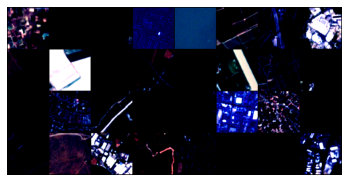

In [9]:
class_labels = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial','Pasture','PermanentCrop','Residential','River','SeaLake']  # Replace with your actual class labels
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cm, class_labels, title='Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt
import torchvision


# Show some example images with predicted labels
model.eval()
images, labels = next(iter(test_loader))
outputs = model(images)
predicted = torch.argmax(outputs, dim=1)

# Display images
image_grid = torchvision.utils.make_grid(images)
plt.imshow(image_grid.permute(1, 2, 0))
plt.axis('off')

print("True labels: ", " ".join(f"{class_labels[labels[j]]:5s}" for j in range(4)))
print("Predicted:   ", " ".join(f"{class_labels[predicted[j]]:5s}" for j in range(4)))
plt.show()

